# Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
import numpy as np
import pandas as pd

# load the data

In [3]:
df = pd.read_csv("data.csv")
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [4]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [5]:
df.tail()

,x1,x2,y
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0
2226,109.624009,1.000000e+08,0


In [6]:
df.columns

Index(['x1', 'x2', 'y'], dtype='object')

In [7]:
df.shape

(2227, 3)

In [8]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

# missing value treatment

In [9]:
df['x1'].mean()

-4.818766123605403

In [10]:
data =df.isnull()
data= data.any(axis=1)
data1 = df[data]

In [11]:
data1

,x1,x2,y
36,NaN,116.138522,1
44,-99.627522,NaN,1
98,NaN,36.905402,1
268,NaN,-116.385719,1
1084,NaN,34.714328,0
1092,55.162258,NaN,0
1318,NaN,53.182191,0
1430,-74.126054,NaN,0


In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [14]:
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram

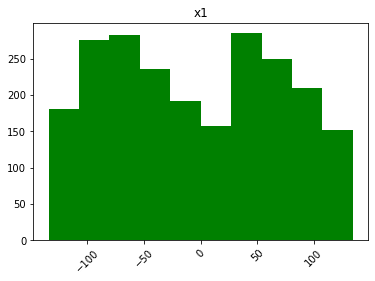

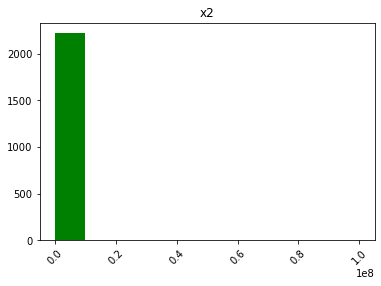

In [16]:
for x in df.columns:
    if df[x].dtype == "float64":
        plt.hist(df[x],color="green")
        plt.title(x)
        plt.xticks(rotation=45)
        plt.show()
        
    else:
        pass

# Boxplot

<AxesSubplot:xlabel='x1'>

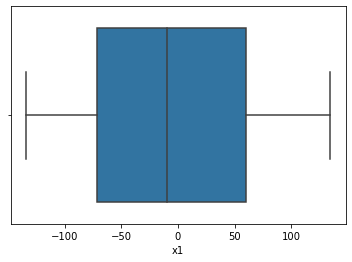

In [17]:
sns.boxplot(df['x1'])

<AxesSubplot:xlabel='x2'>

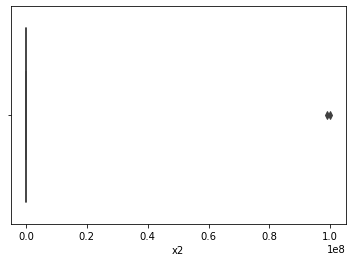

In [18]:
sns.boxplot(df['x2'])

<AxesSubplot:xlabel='x1', ylabel='y'>

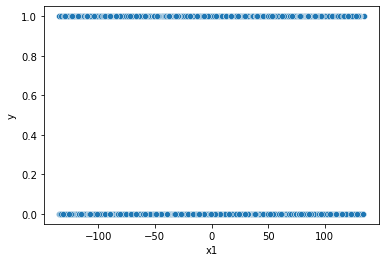

In [19]:
sns.scatterplot('x1','y',data=df)

<AxesSubplot:xlabel='x2', ylabel='y'>

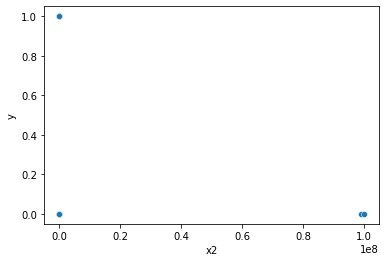

In [20]:
sns.scatterplot('x2','y',data=df)

# Outliers Detection

<AxesSubplot:xlabel='x2'>

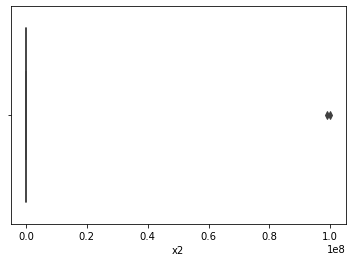

In [21]:
sns.boxplot(df["x2"])

In [22]:
upper_boundary=df["x2"].mean()+3*df["x2"].std()
lower_boundary=df["x2"].mean()-3*df["x2"].std()
print(lower_boundary), print(upper_boundary),print(df["x2"].mean())

-8870362.887794388
9049718.521260696
89677.81673315338


(None, None, None)

In [23]:
IQR =df["x2"].quantile(0.75)-df["x2"].quantile(0.25)

In [24]:
IQR

144.164140905

In [25]:
lower_bridge=df["x2"].quantile(0.25)-(IQR*1.5)
Upper_bridge=df["x2"].quantile(0.75)+(IQR*1.5)
print(lower_bridge),print(Upper_bridge)


-296.5058689975
280.1506946225


(None, None)

In [26]:
### Extreme outliers
lower_bridge=df["x2"].quantile(0.25)-(IQR*3)
Upper_bridge=df["x2"].quantile(0.75)+(IQR*3)
print(lower_bridge),print(Upper_bridge)

-512.7520803550001
496.39690598000004


(None, None)

In [27]:
data2 =df.copy()

In [28]:
data2.loc[data2["x2"]>=9049718.5212,"x2"]=9049718.5212

In [29]:
data2.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


<AxesSubplot:xlabel='x2'>

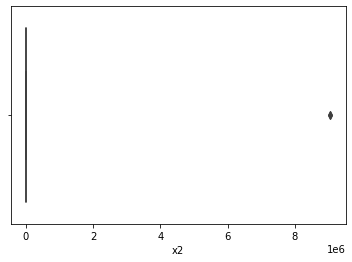

In [30]:
sns.boxplot(data2["x2"])

In [31]:
X=df.drop(columns=['y'])
y=df['y']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1775, 2), (444, 2), (1775,), (444,))

In [34]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [35]:
import Innomatics

# Logistics regression classifier

In [36]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X,y)

LogisticRegression()

In [37]:
import time
start_time_log = time.time()

lr_clf1= LogisticRegression()
lr_clf1.fit(X_train, y_train)
y_pred1 = lr_clf1.predict(X_test)
y_prob1 = lr_clf1.predict_proba(X_test)

a1 = accuracy_score(y_test,y_pred1)

end_time_log = time.time()
print('Duration :', end_time_log - start_time_log)

Duration : 0.032911062240600586


In [38]:
np.unique(y_train)

array([0, 1], dtype=int64)

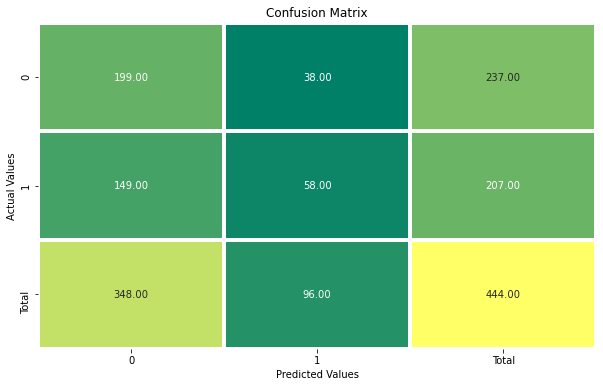

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.57      0.84      0.68       237
           1       0.60      0.28      0.38       207

    accuracy                           0.58       444
   macro avg       0.59      0.56      0.53       444
weighted avg       0.59      0.58      0.54       444


************************************Kappa Score************************************


Kappa Score = 0.12406633751107743


In [39]:
Innomatics.classification_metric(y_test,y_pred1,y_prob1[:,1],
                                label = [0,1],
                                n = 50,verbose = True)

# Support Vector Machine

In [40]:
import time
start_time_log = time.time()

model_linear= SVC(kernel='linear', C=1)
model_linear.fit(X_train, y_train)
y_pred2 = model_linear.predict(X_test)

a2 = accuracy_score(y_test,y_pred2)

end_time_log = time.time()
print('Duration :', end_time_log - start_time_log)

Duration : 65.69662308692932


In [41]:
a2

0.5337837837837838

In [42]:
import time
start_time_log = time.time()

model_linear= SVC(kernel='rbf')
model_linear.fit(X_train, y_train)
y_pred3 = model_linear.predict(X_test)

a3 = accuracy_score(y_test,y_pred3)

end_time_log = time.time()
print('Duration :', end_time_log - start_time_log)

Duration : 0.04969000816345215


In [43]:
a3

0.5337837837837838

# Decision Tree Classifier

In [44]:
start_time_log = time.time()

dt_clf4 = DecisionTreeClassifier() #Build
dt_clf4.fit(X_train, y_train) #Train
y_pred4 = dt_clf4.predict(X_test)
y_prob4 = dt_clf4.predict_proba(X_test)
a4=accuracy_score(y_test,y_pred4)

end_time_log = time.time()
print('Duration :', end_time_log - start_time_log)

Duration : 0.008975028991699219


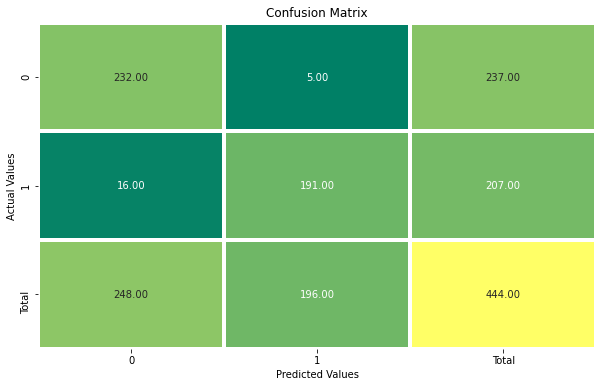

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       237
           1       0.97      0.92      0.95       207

    accuracy                           0.95       444
   macro avg       0.95      0.95      0.95       444
weighted avg       0.95      0.95      0.95       444


************************************Kappa Score************************************


Kappa Score = 0.904650877408271


In [45]:
Innomatics.classification_metric(y_test,y_pred4,y_prob4[:,1],
                                label = [0,1],
                                n = 50,verbose = True)

# K-Nearest Neighbor Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
start_time_log = time.time()

knn_clf5 = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn_clf5.fit(X_train, y_train) 
y_pred5 = knn_clf5.predict(X_test)

y_prob5 = knn_clf5.predict_proba(X_test)
a5=accuracy_score(y_test,y_pred5)


end_time_log = time.time()
print('Duration :', end_time_log - start_time_log)

Duration : 0.02596592903137207


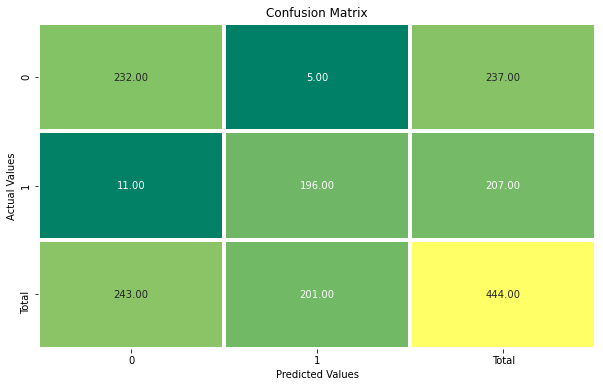

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       237
           1       0.98      0.95      0.96       207

    accuracy                           0.96       444
   macro avg       0.96      0.96      0.96       444
weighted avg       0.96      0.96      0.96       444


************************************Kappa Score************************************


Kappa Score = 0.9274643141579366


In [47]:
Innomatics.classification_metric(y_test,y_pred5,y_prob5[:,1],
                                label = [0,1],
                                n = 50,verbose = True)

In [48]:
mod_names=["LogisticRegression","SVC LINEAR", "SVC RBF","DecisionTreeClassifier","KNN"]

In [49]:
acc=[]
for i in a1,a2,a3,a4,a5:
    acc.append(i)

In [50]:
mod_names

['LogisticRegression',
 'SVC LINEAR',
 'SVC RBF',
 'DecisionTreeClassifier',
 'KNN']

In [51]:
acc

[0.5788288288288288,
 0.5337837837837838,
 0.5337837837837838,
 0.9527027027027027,
 0.963963963963964]

In [52]:
import pandas as pd
acc_df= pd.DataFrame(np.array(acc),index = mod_names,columns=['Accuracy'])
acc_df.sort_values('Accuracy',ascending=False)

,Accuracy
KNN,0.963964
DecisionTreeClassifier,0.952703
LogisticRegression,0.578829
SVC LINEAR,0.533784
SVC RBF,0.533784


<AxesSubplot:>

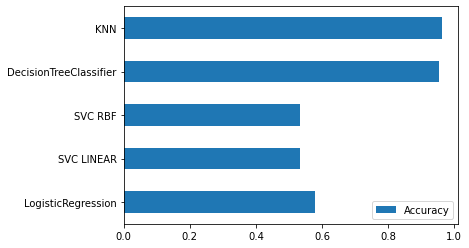

In [53]:
acc_df.plot.barh()

## Observations:

- while doing the missing value treatment there was only 8 values found they were dropped.

- moving to the outliers there was few value that was out of range so it has neglected.

- finally while building the ML model it was found that KNN was giving good results so i select the KNN. 

- KNN is the best model.